## Proyecto final BOOTCAMP IRONHACK
###### Estrategias de e-COMERCE

COMPANY = GYMSHARK

### PASO 4 EDA
- website : https://eu.gymshark.com/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random

In [2]:
# Importo el CSV de GYMSHARK SALES CLEAN resultante del fake
sales_gymshark = pd.read_csv('sales_gymshark_clean2.csv')

In [3]:
sales_gymshark.head()

,InvoiceNo,StockCode,Description,Size,Quantity,InvoiceDate,CustomerID,Country,Rating,Colour,Price,Category,Day,Month,Year,Hour,DayOfWeek
0,282618,76203V,Apex T-Shirt,L,1,2023-11-22 11:30:00,17849,Australia,4.5,River Stone Grey/Drift Grey,34.04,Men,22,11,2023,11:30:00,2
1,178838,43343R,Pursuit Duffle Bag,M,3,2023-12-25 11:54:00,90379,USA,4.6,Black/White,91.96,Women,25,12,2023,11:54:00,0
2,317707,11168Y,Everyday Mini Backpack,L,1,2023-03-30 09:05:00,73114,UK,0.0,Dusk Green,31.50,Women,30,3,2023,09:05:00,3
3,998032,21561X,No Show Performance Socks,S,6,2023-02-21 15:44:00,21105,USA,5.0,Plum Pink Marl,9.90,Men,21,2,2023,15:44:00,1
4,986803,64146P,GS X Libby Shorts,L,1,2023-03-12 09:29:00,23910,USA,4.2,Camo Brown,44.00,Men,12,3,2023,09:29:00,6


### Estadísticas Descriptivas:

Para las columnas numéricas (Cantidad, Precio, Rating) calculo las estadísticas:
- media
- mediana
- desviación estándar
- mínimo 
- máximo

Para las columnas categóricas, usare el value_counts() para obtener un recuento de los valores únicos en cada columna.

In [4]:
# Estadísticas descriptivas para columnas numéricas
numeric_stats = sales_gymshark[['Quantity', 'Price', 'Rating']].describe()
numeric_stats

,Quantity,Price,Rating
count,100000.000000,100000.000000,100000.000000
mean,2.090960,35.629327,4.012884
std,1.250617,16.871023,1.242913
min,1.000000,6.720000,0.000000
25%,1.000000,23.100000,4.100000
50%,2.000000,33.600000,4.400000
75%,3.000000,44.000000,4.600000
max,8.000000,145.475000,5.000000


C:\Users\genes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([0, 1, 2]),
 [Text(0, 0, 'Men'), Text(1, 0, 'Women'), Text(2, 0, 'Accesorios')])

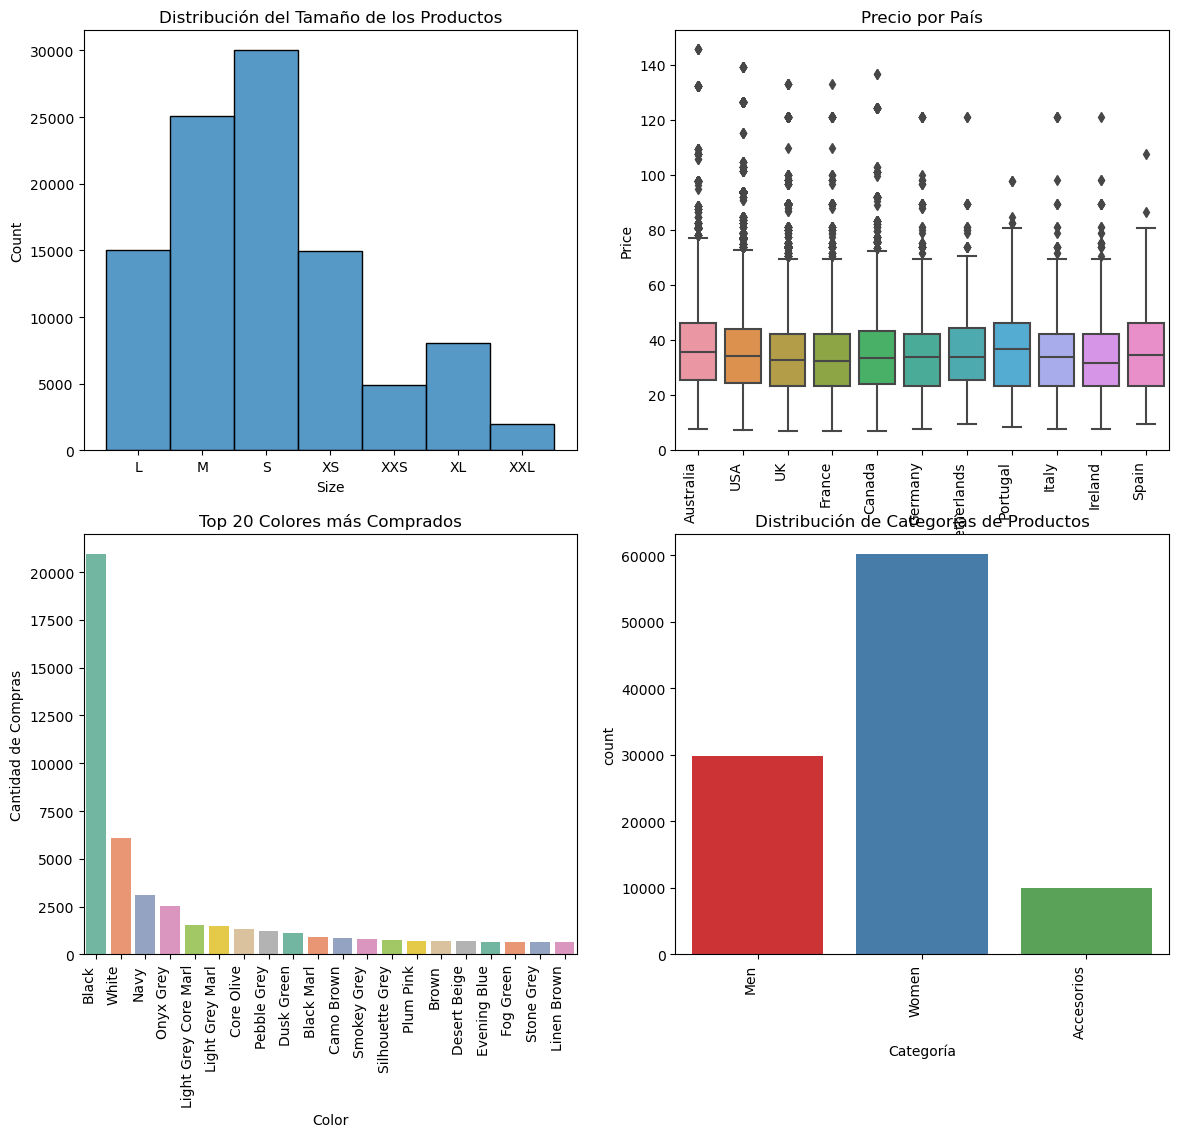

In [5]:
# Recuentos de valores únicos para columnas categóricas
categorical_counts = sales_gymshark[['Size', 'Country', 'Colour', 'Category']].apply(lambda x: pd.Series(x).value_counts())

# Visualización con histogramas, boxplots y diagramas de barras
plt.figure(figsize=(14, 12))

# Histograma para el tamaño de los productos
plt.subplot(2, 2, 1)
sns.histplot(sales_gymshark['Size'], discrete=True)
plt.title('Distribución del Tamaño de los Productos')

# Boxplot para los precios por país
plt.subplot(2, 2, 2)
sns.boxplot(x='Country', y='Price', data=sales_gymshark)
plt.title('Precio por País')
plt.xticks(rotation=90, ha='right')  # Inclina las etiquetas 45 grados y alinea a la derecha


# Calcular los top 20 colores más comprados
top_colors = sales_gymshark['Colour'].value_counts().head(20).index.tolist()

# Diagrama de barras para los colores de los productos
plt.subplot(2, 2, 3)
sns.countplot(x='Colour', data=sales_gymshark, palette='Set2', order=top_colors)
plt.title('Top 20 Colores más Comprados')
plt.xlabel('Color')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=90, ha='right')  # Inclina las etiquetas 45 grados y alinea a la derecha


# Diagrama de barras para las categorías de productos
plt.subplot(2, 2, 4)
sns.countplot(x='Category', data=sales_gymshark, palette='Set1')
plt.title('Distribución de Categorías de Productos')
plt.xlabel('Categoría')
plt.xticks(rotation=90, ha='right')  # Inclina las etiquetas 45 grados y alinea a la derecha



### Exploración de la Distribución de Variables:


C:\Users\genes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\genes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\genes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


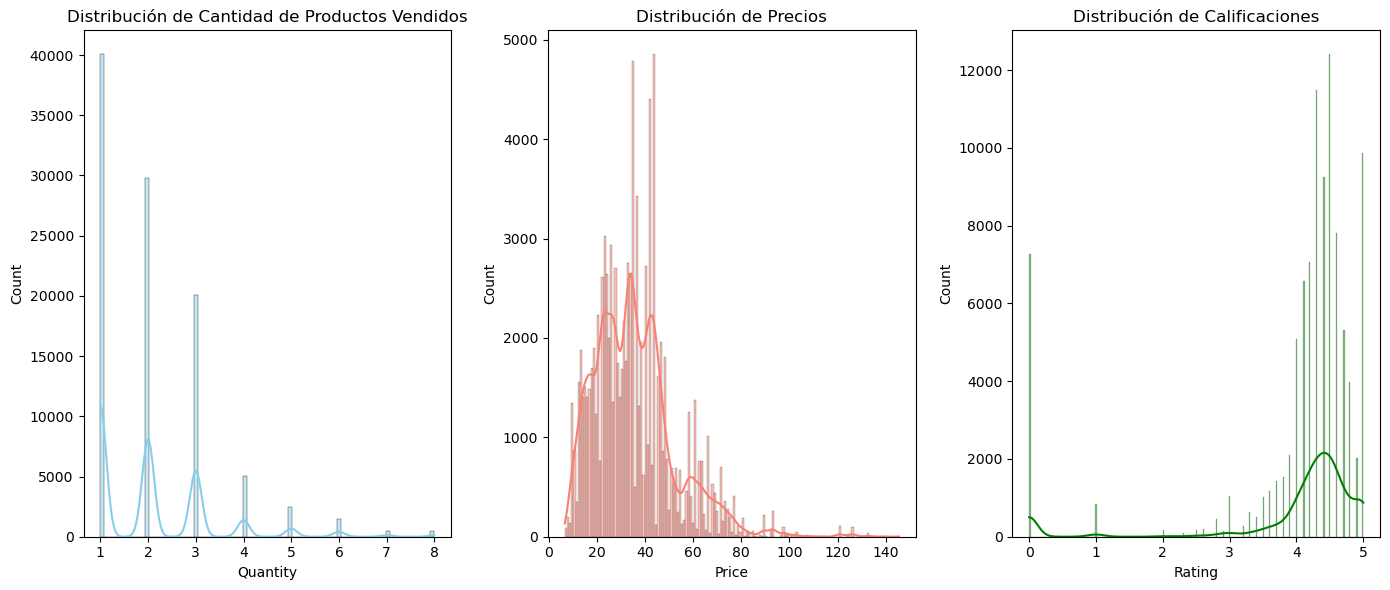

In [6]:
plt.figure(figsize=(14, 6))

# Histograma y KDE plot para la cantidad de productos vendidos
plt.subplot(1, 3, 1)
sns.histplot(sales_gymshark['Quantity'], kde=True, color='skyblue')
plt.title('Distribución de Cantidad de Productos Vendidos')

# Histograma y KDE plot para los precios
plt.subplot(1, 3, 2)
sns.histplot(sales_gymshark['Price'], kde=True, color='salmon')
plt.title('Distribución de Precios')

# Histograma y KDE plot para las calificaciones
plt.subplot(1, 3, 3)
sns.histplot(sales_gymshark['Rating'], kde=True, color='green')
plt.title('Distribución de Calificaciones')

plt.tight_layout()
plt.show()


### Correlaciones:

<module 'matplotlib.pyplot' from 'C:\\Users\\genes\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

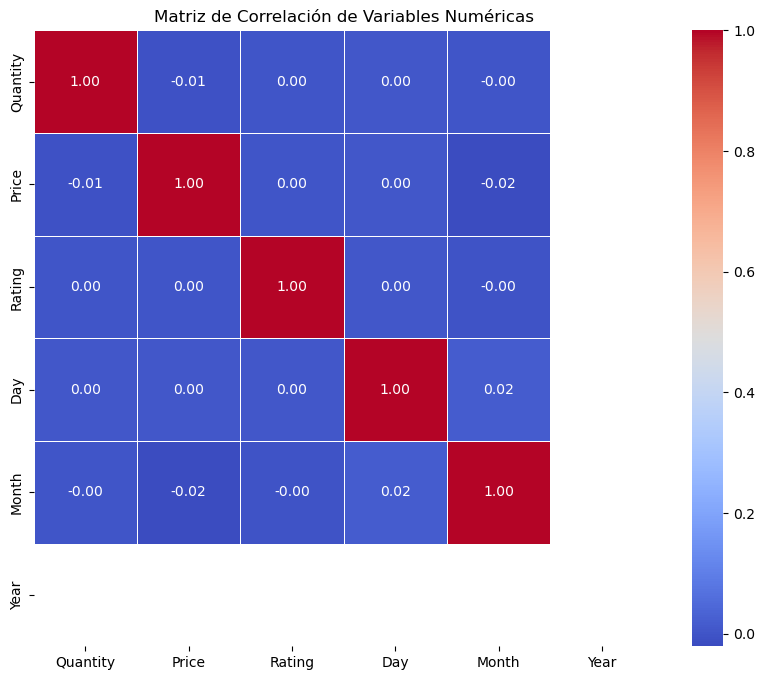

In [7]:
# Seleccionar las columnas numéricas para el cálculo de la matriz de correlación
numeric_columns = sales_gymshark[['Quantity', 'Price', 'Rating', 'Day', 'Month', 'Year']]

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt


##### DESCRIPCION: Esto significa que no hay una relación lineal clara entre la cantidad, el precio, la calificación, el día, el mes y el año.

Es importante tener en cuenta que la ausencia de una correlación lineal no significa necesariamente que no haya otras relaciones entre las variables. Podría haber relaciones no lineales o dependencias más complejas entre las variables que no se capturan mediante la correlación lineal.

#### Distribución de ventas por país: 

Visualizar la distribución de ventas por país utilizando un gráfico de barras o un mapa. 
Identificar tus principales mercados y oportunidades de expansión.

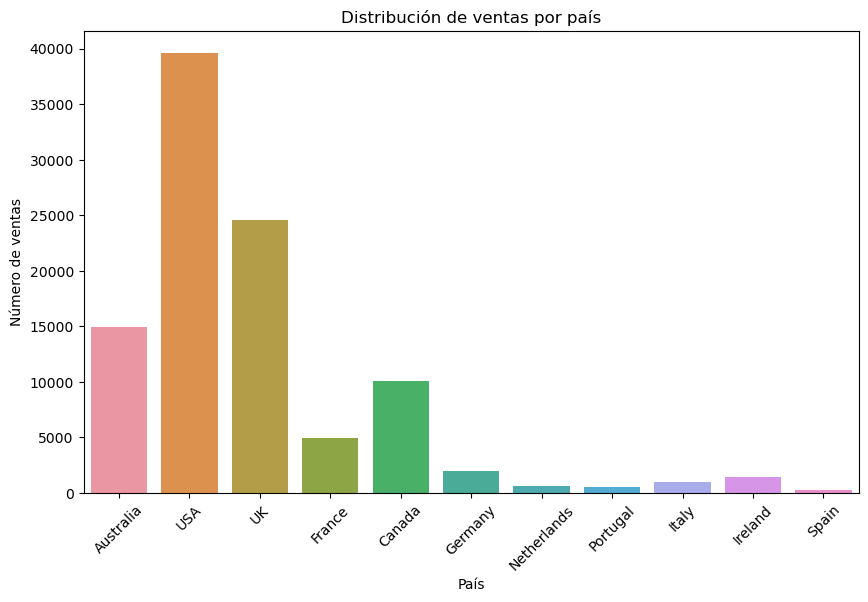

In [8]:
# 1. Distribución de ventas por país
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_gymshark, x='Country')
plt.title('Distribución de ventas por país')
plt.xlabel('País')
plt.ylabel('Número de ventas')
plt.xticks(rotation=45)
plt.show()

#### Análisis de la distribución de categorías de productos: 

Examinar la distribución de tus productos por categoría utilizando un gráfico de barras. 
Comprender qué categorías son más populares entre los clientes.



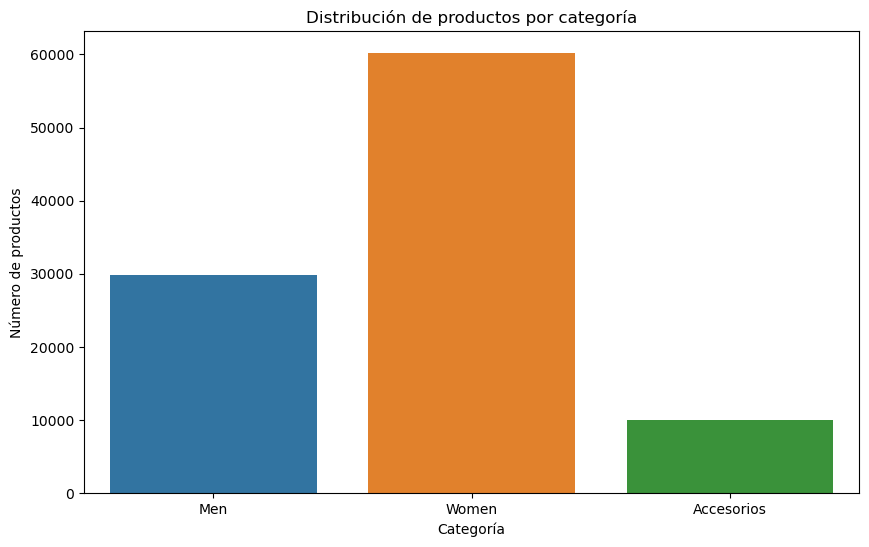

In [9]:
# 2. Análisis de la distribución de categorías de productos
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_gymshark, x='Category')
plt.title('Distribución de productos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de productos')
plt.show()

#### Análisis de la distribución de ventas por mes o día de la semana: 

Corroborar si hay algún patrón estacional en tus ventas analizando la distribución de ventas por mes o día de la semana.


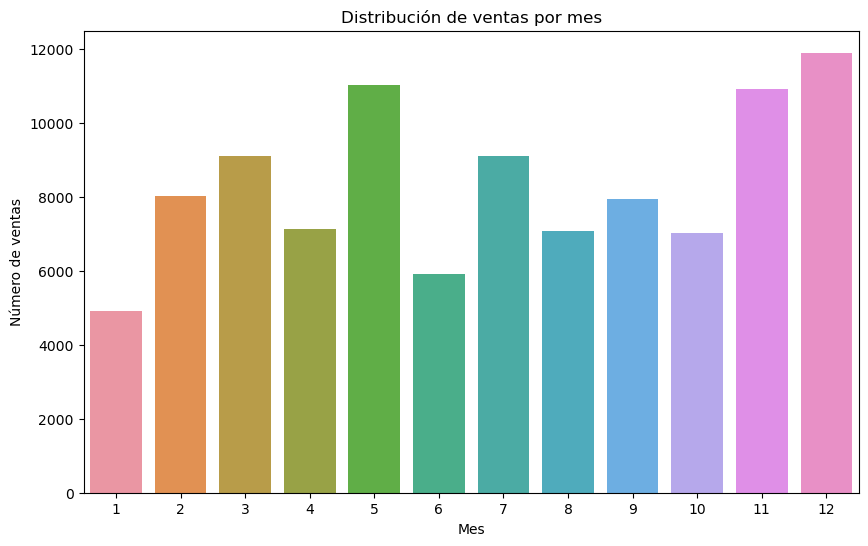

In [10]:
# 3. Análisis de la distribución de ventas por mes
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_gymshark, x='Month')
plt.title('Distribución de ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Número de ventas')
plt.show()

#### Correlación entre la calificación y las ventas:

Explorar si existe alguna relación entre la calificación de los productos y las ventas utilizando un gráfico de dispersión o un gráfico de barras.


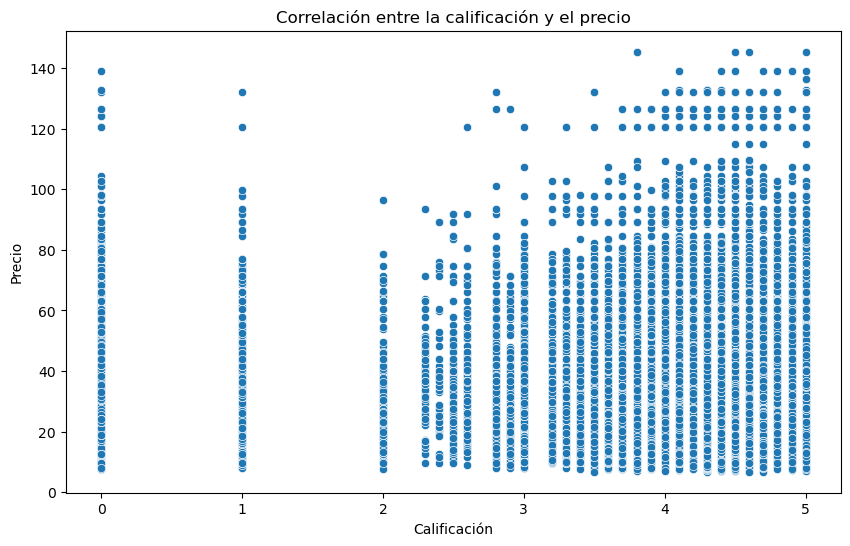

In [11]:
# 4. Correlación entre la calificación y las ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_gymshark, x='Rating', y='Price')
plt.title('Correlación entre la calificación y el precio')
plt.xlabel('Calificación')
plt.ylabel('Precio')
plt.show()

#### Análisis de la distribución de precios: 

Puedes examinar la distribución de precios de tus productos utilizando un histograma o un boxplot para identificar los rangos de precios más comunes.



C:\Users\genes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


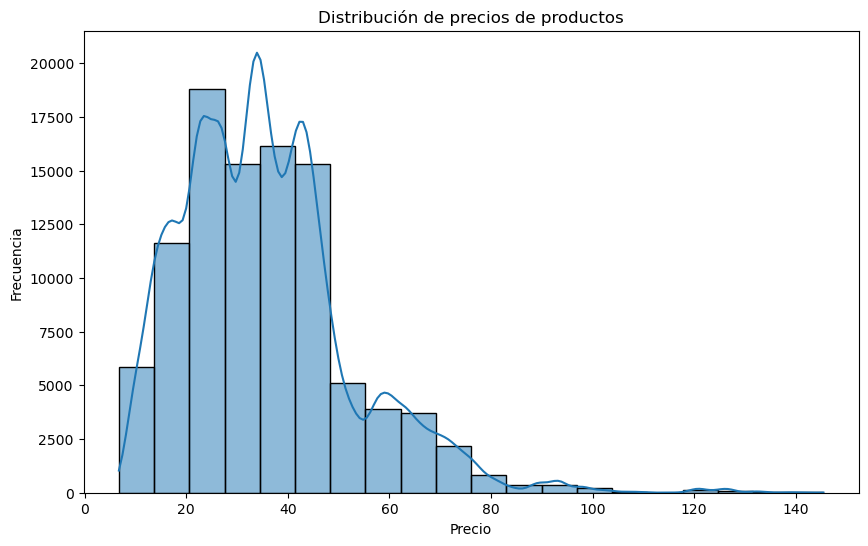

In [12]:
# 5. Análisis de la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(data=sales_gymshark, x='Price', bins=20, kde=True)
plt.title('Distribución de precios de productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

#### Análisis de la distribución de tamaños de productos: 

Explorar la distribución de tallas de productos utilizando un gráfico de barras o un histograma.

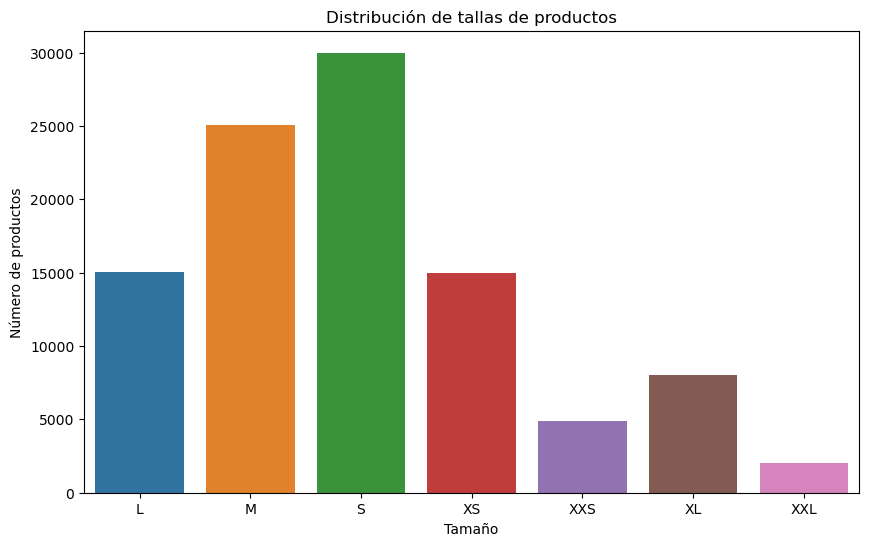

In [13]:
# 6. Análisis de la distribución de tamaños de productos
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_gymshark, x='Size')
plt.title('Distribución de tallas de productos')
plt.xlabel('Tamaño')
plt.ylabel('Número de productos')
plt.show()

#### Análisis de la distribución de cantidad de productos vendidas:

Distribución de las cantidades vendidas utilizando un histograma o un boxplot para identificar los patrones de compra de los clientes.


C:\Users\genes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


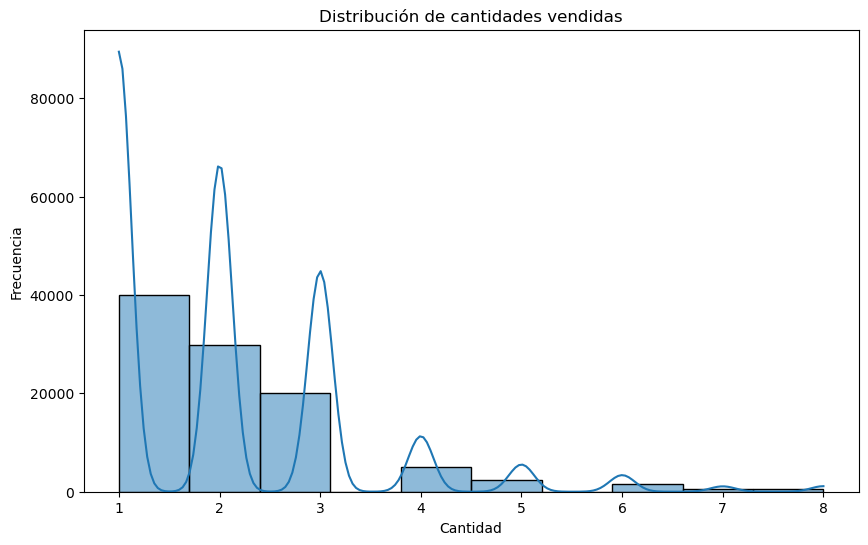

In [14]:
# 7. Análisis de la distribución de cantidades vendidas
plt.figure(figsize=(10, 6))
sns.histplot(data=sales_gymshark, x='Quantity', bins=10, kde=True)
plt.title('Distribución de cantidades vendidas')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

#### Análisis de la evolución temporal de las ventas: 

Al trazar un gráfico de líneas se muestra cómo han evolucionado las ventas a lo largo del tiempo (por ejemplo, mes a mes o trimestre a trimestre).

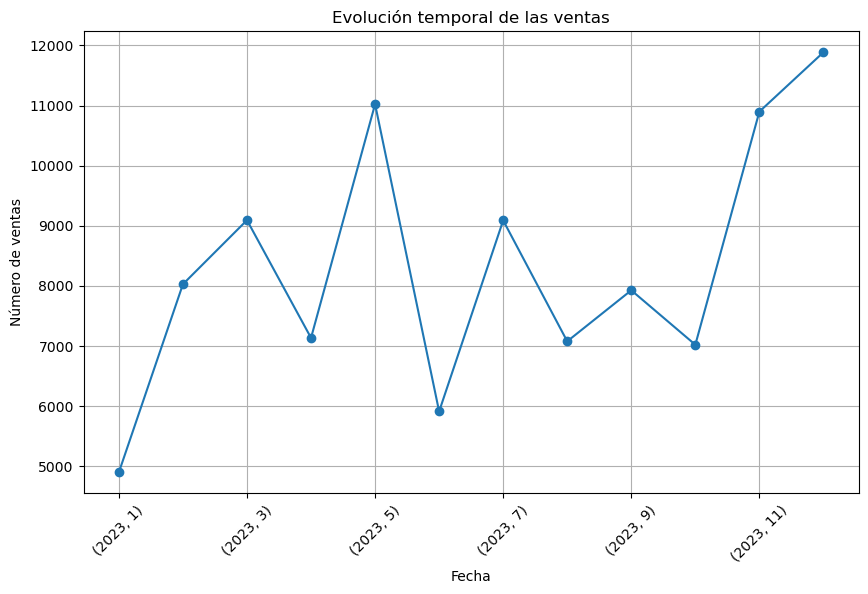

In [15]:
# 8. Análisis de la evolución temporal de las ventas
plt.figure(figsize=(10, 6))
sales_by_month = sales_gymshark.groupby(['Year', 'Month']).size()
sales_by_month.plot(kind='line', marker='o')
plt.title('Evolución temporal de las ventas')
plt.xlabel('Fecha')
plt.ylabel('Número de ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### Análisis de la distribución de ventas por día de la semana: 
Visualizar si hay algún patrón en las ventas según el día de la semana, por ejemplo, ¿hay más ventas los fines de semana o durante la semana laboral?

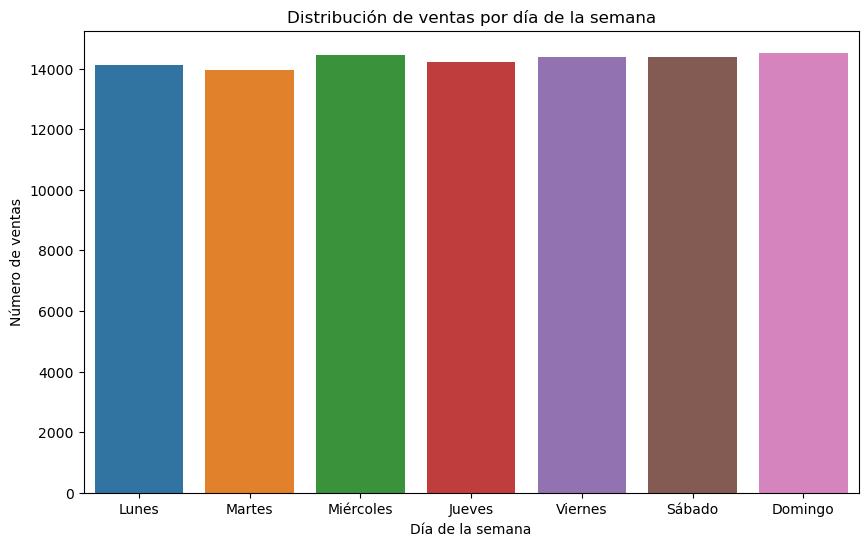

In [16]:
# 9. Análisis de la distribución de ventas por día de la semana
plt.figure(figsize=(10, 6))
sales_gymshark['Date'] = pd.to_datetime(sales_gymshark[['Year', 'Month', 'Day']])
sales_gymshark['DayOfWeek'] = sales_gymshark['Date'].dt.dayofweek
sns.countplot(data=sales_gymshark, x='DayOfWeek')
plt.title('Distribución de ventas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de ventas')
plt.xticks(ticks=range(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.show()


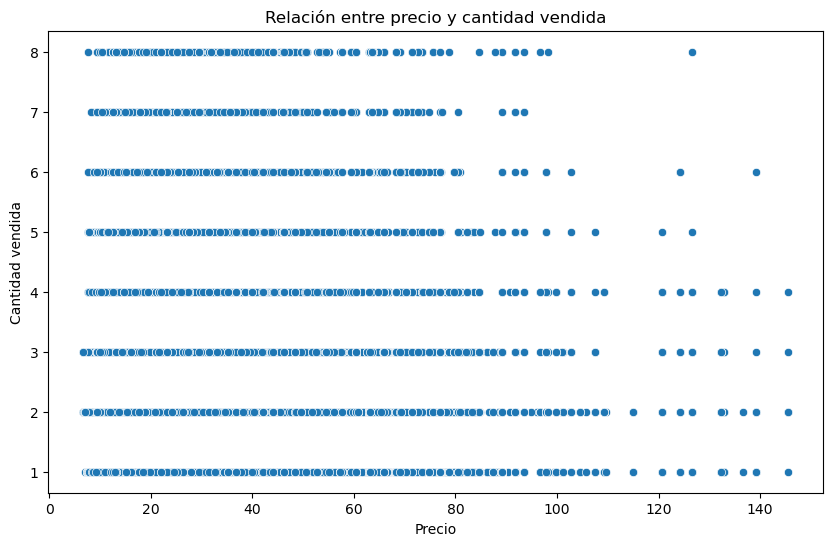

In [17]:
# 10. Análisis de la relación entre el precio y la cantidad vendida
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_gymshark, x='Price', y='Quantity')
plt.title('Relación entre precio y cantidad vendida')
plt.xlabel('Precio')
plt.ylabel('Cantidad vendida')
plt.show()


#### Análisis de la relación entre el precio y la cantidad vendida: 

Explorar si existe alguna relación entre el precio de un producto y la cantidad vendida utilizando un gráfico de dispersión o un gráfico de regresión.

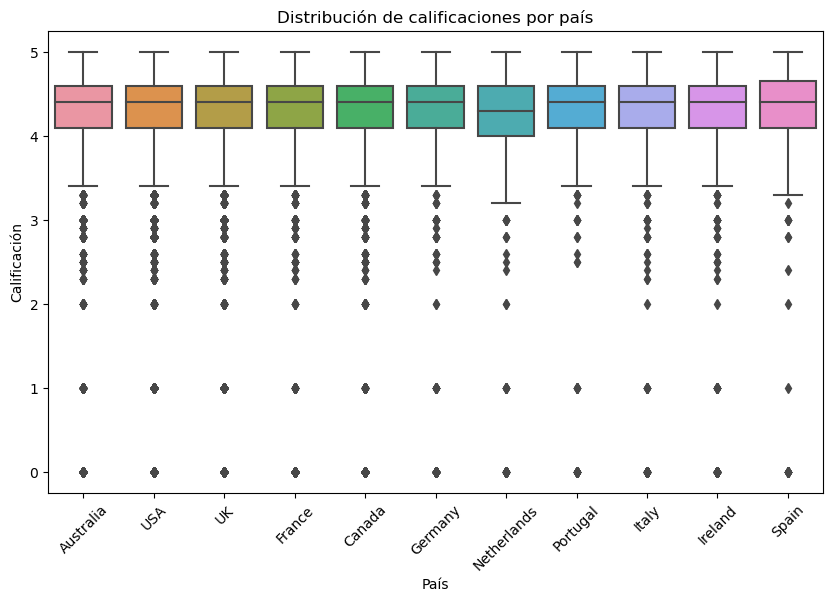

In [18]:
# 11. Análisis de la distribución de las calificaciones por país
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_gymshark, x='Country', y='Rating')
plt.title('Distribución de calificaciones por país')
plt.xlabel('País')
plt.ylabel('Calificación')
plt.xticks(rotation=45)
plt.show()


#### Análisis de la relación entre el precio y la cantidad vendida: 

Verificar si existe alguna relación entre el precio de un producto y la cantidad vendida utilizando un gráfico de dispersión o un gráfico de regresión.

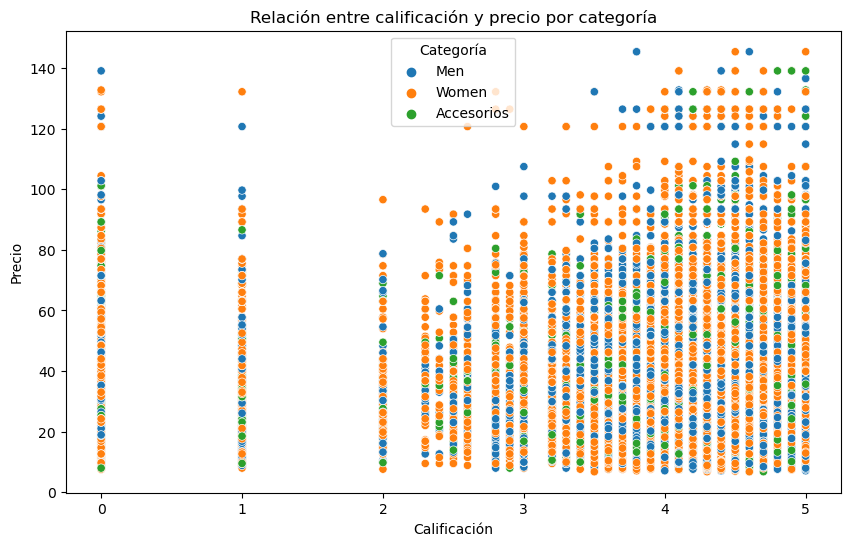

In [19]:
# 12. Análisis de la relación entre la calificación y el precio por categoría
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_gymshark, x='Rating', y='Price', hue='Category')
plt.title('Relación entre calificación y precio por categoría')
plt.xlabel('Calificación')
plt.ylabel('Precio')
plt.legend(title='Categoría')
plt.show()


#### Análisis de la distribución de clientes por país: 
Explorar la distribución de clientes en función del país para comprender mejor la base de clientes de tu empresa y identificar posibles áreas de enfoque para estrategias de marketing y ventas.

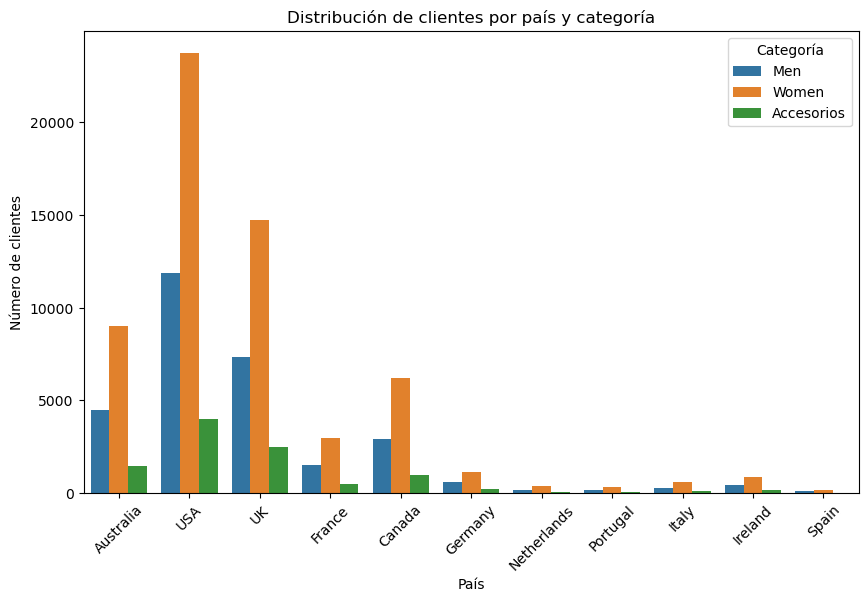

In [20]:
# 13. Análisis de la distribución de clientes por país
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_gymshark, x='Country', hue='Category')
plt.title('Distribución de clientes por país y categoría')
plt.xlabel('País')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.legend(title='Categoría')
plt.show()

#### Análisis de la variación de precios a lo largo del tiempo: 
Verificar cómo varían los precios de tus productos a lo largo del tiempo para identificar tendencias de precios y ajustar tu estrategia de fijación de precios en consecuencia.

C:\Users\genes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\genes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


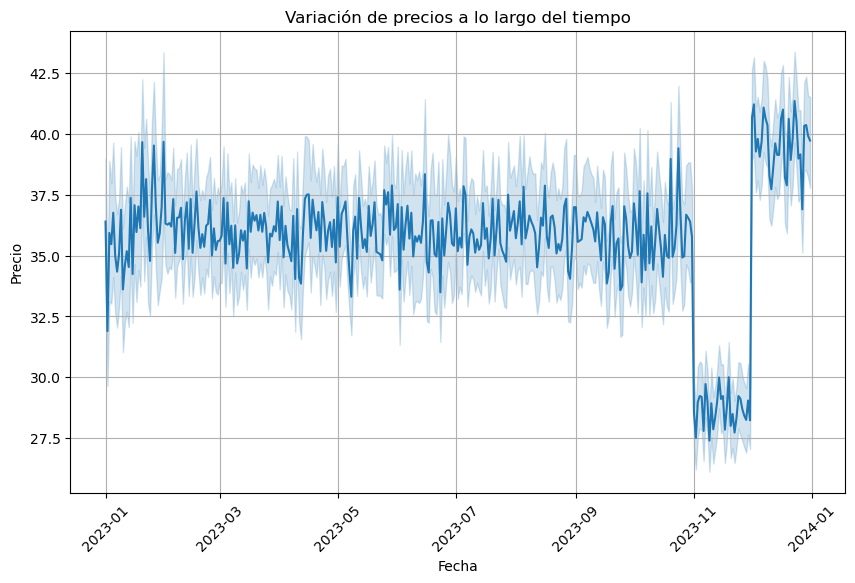

In [21]:
# 14. Análisis de la variación de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_gymshark, x='Date', y='Price')
plt.title('Variación de precios a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### Análisis de la relación entre la cantidad vendida y la categoría de productos por país: 

Revisar cómo varía la cantidad vendida de productos en diferentes categorías según el país para comprender mejor las preferencias de compra de tus clientes en diferentes regiones.


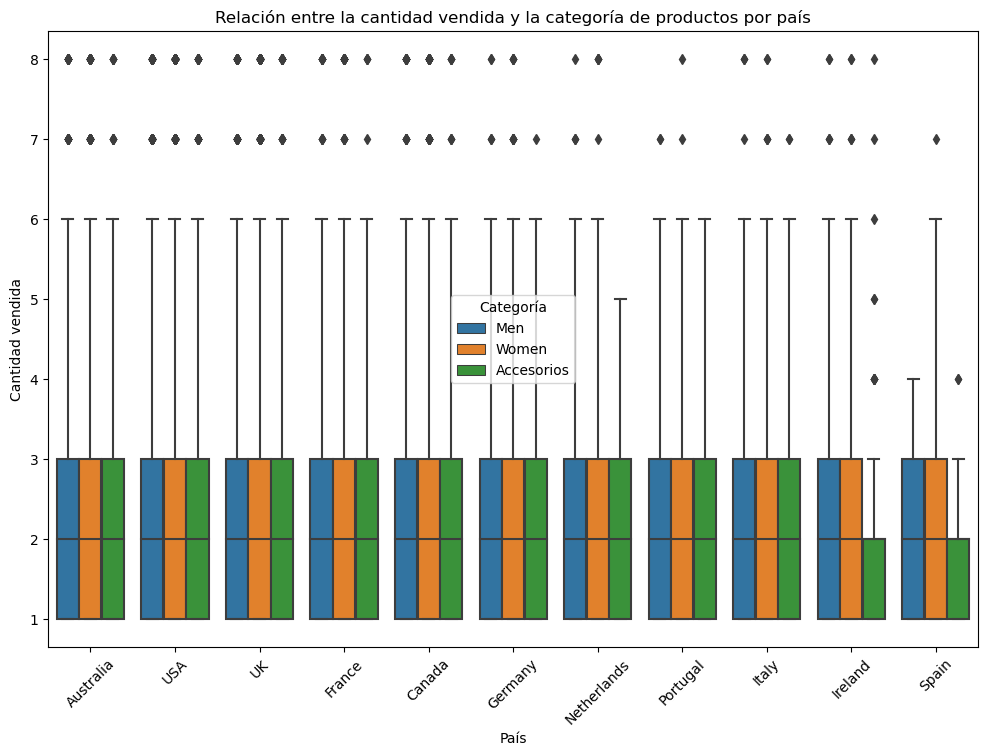

In [22]:
# 15. Análisis de la relación entre la cantidad vendida y la categoría de productos por país
plt.figure(figsize=(12, 8))
sns.boxplot(data=sales_gymshark, x='Country', y='Quantity', hue='Category')
plt.title('Relación entre la cantidad vendida y la categoría de productos por país')
plt.xlabel('País')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=45)
plt.legend(title='Categoría')
plt.show()


#### Análisis de la distribución de las calificaciones de los productos por categoría y país: 

Explorar cómo varían las calificaciones de los productos en diferentes categorías y países para identificar tendencias de satisfacción del cliente y áreas de mejora.

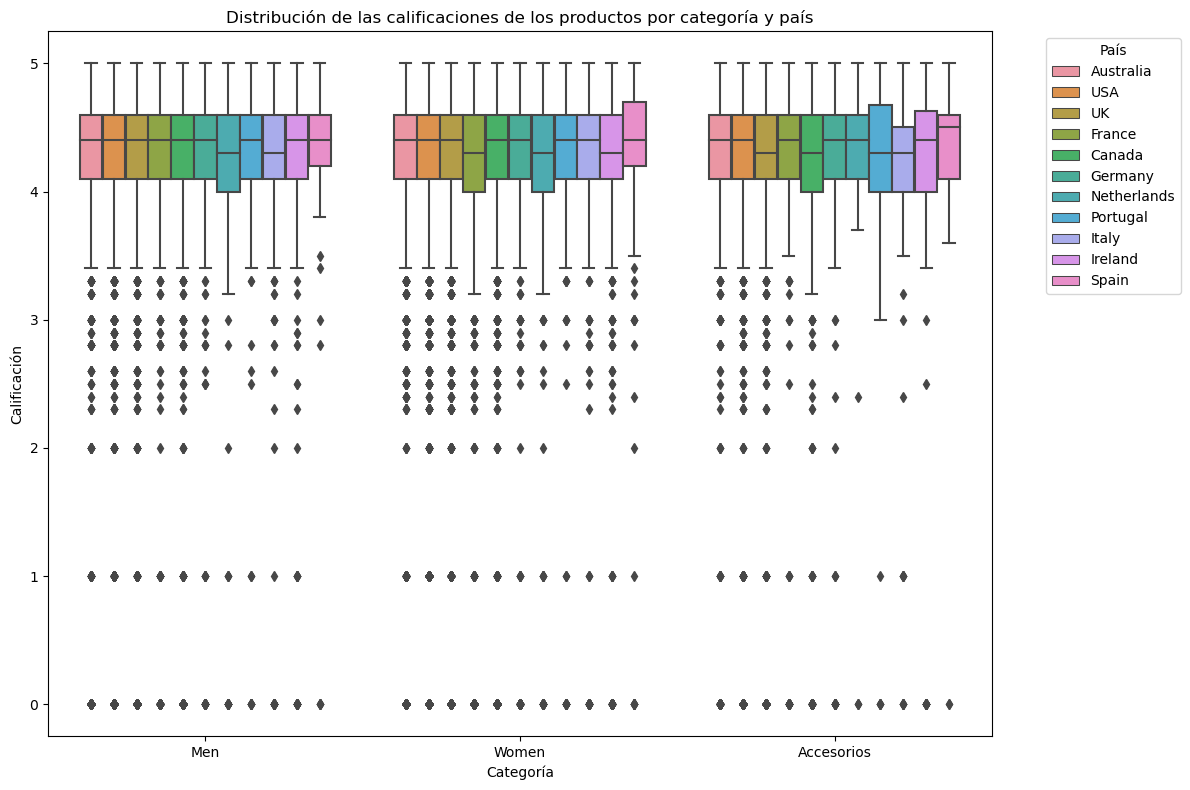

In [23]:
# 16. Análisis de la distribución de las calificaciones de los productos por categoría y país
plt.figure(figsize=(12, 8))
sns.boxplot(data=sales_gymshark, x='Category', y='Rating', hue='Country')
plt.title('Distribución de las calificaciones de los productos por categoría y país')
plt.xlabel('Categoría')
plt.ylabel('Calificación')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Análisis de la distribución de precios por categoría y país: 

Cómo varían los precios de los productos en diferentes categorías y países para comprender mejor la estructura de precios en tu mercado objetivo.

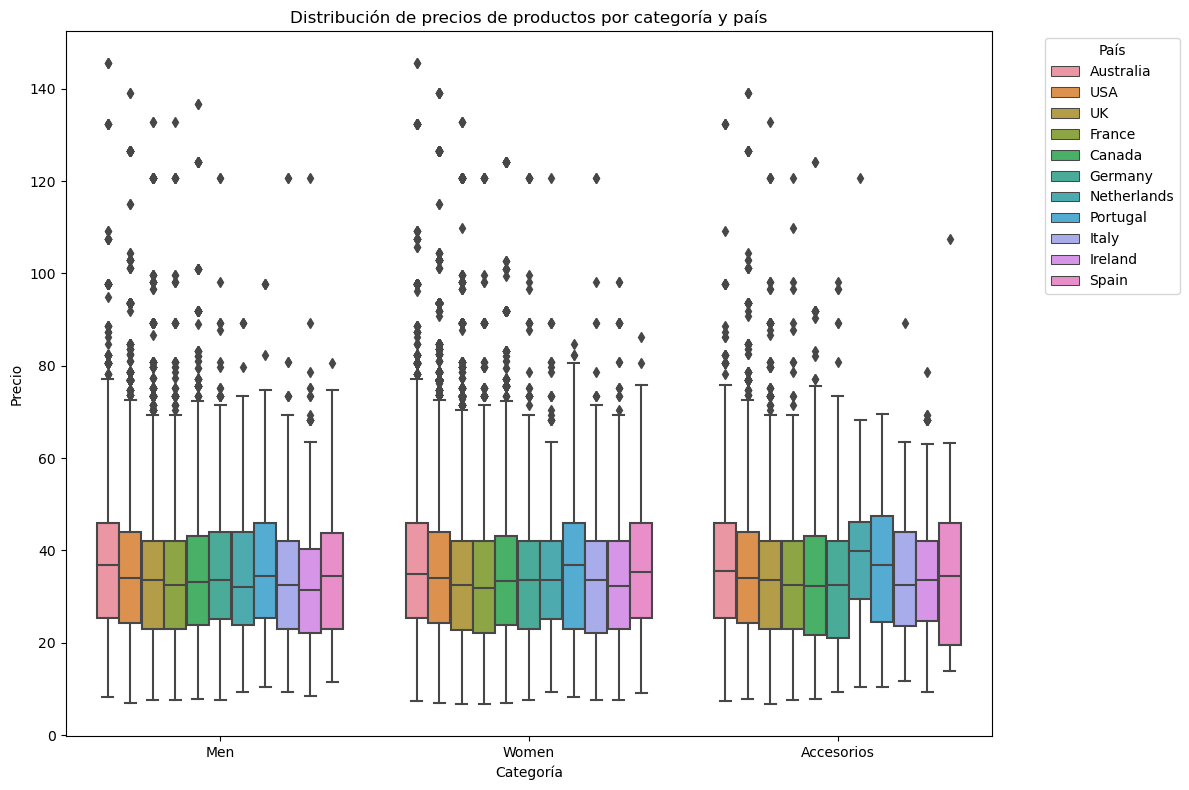

In [24]:
# 17. Análisis de la distribución de precios por categoría y país
plt.figure(figsize=(12, 8))
sns.boxplot(data=sales_gymshark, x='Category', y='Price', hue='Country')
plt.title('Distribución de precios de productos por categoría y país')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
